In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vk_id = 253802
kw_id = 277906
jr_id = 303669
ss_id = 267192

In [67]:
url = 'https://stats.espncricinfo.com/ci/engine/player/{}.html?class={};home_or_away=1;home_or_away=2;home_or_away=3;result=1;result=2;result=4;template=results;type=batting'

In [78]:
def get_player_info(id, formatt):
    player_url = url.format(id, formatt)
    data = pd.read_html(player_url)[3]
    data = data.drop(columns=['Unnamed: 15', 'Span'])
    data = data.dropna(0)
    data = data.replace('-', '0')
    data['HS'] = data['HS'].str.replace('*', '')
    data.iloc[:, 1:6] = data.iloc[:, 1:6].astype(float).astype(int)
    data['BF'] = data['BF'].astype(float).astype(int)
    data['Ave'] = data['Ave'].astype(float)
    data['SR'] = data['SR'].astype(float)
    data.iloc[:, 9:] = data.iloc[:, 9:].astype(float).astype(int)
    return data

# TEST MATCHES

In [5]:
vk_data = get_player_info(vk_id, 1)
kw_data = get_player_info(kw_id, 1)
jr_data = get_player_info(jr_id, 1)
ss_data = get_player_info(ss_id, 1)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [6]:
vk_demographic_data = vk_data.iloc[:23]
vk_year_wise_data = vk_data.iloc[23:35]
vk_szn_wise_data = vk_data.iloc[35:55]
vk_rest_data = vk_data.iloc[55:]

In [7]:
kw_demographic_data = kw_data.iloc[:27]
kw_year_wise_data = kw_data.iloc[27:39]
kw_szn_wise_data = kw_data.iloc[39:58]
kw_rest_data = kw_data.iloc[58:]

In [8]:
jr_demographic_data = jr_data.iloc[:26]
jr_year_wise_data = jr_data.iloc[26:37]
jr_szn_wise_data = jr_data.iloc[37:55]
jr_rest_data = jr_data.iloc[55:]

In [9]:
ss_demographic_data = ss_data.iloc[:25]
ss_year_wise_data = ss_data.iloc[25:37]
ss_szn_wise_data = ss_data.iloc[37:53]
ss_rest_data = ss_data.iloc[53:]

Text(0.5, 1.0, 'Runs Scored by the Fab 4 in tests over the years')

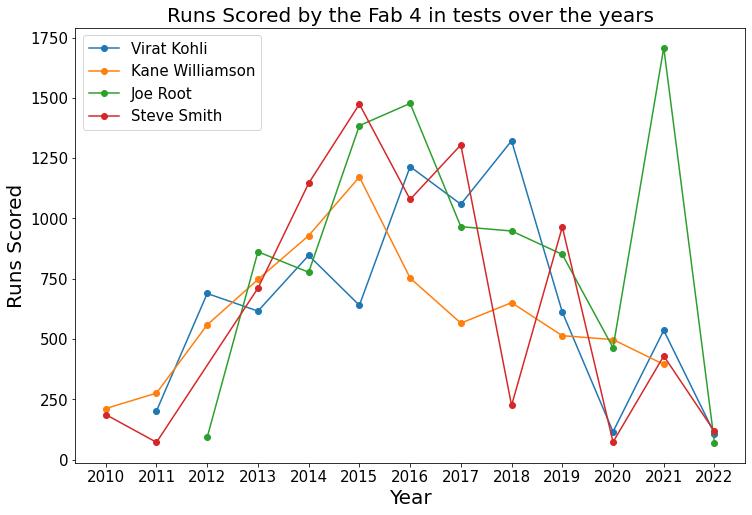

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data['Runs'], '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data['Runs'], '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data['Runs'], '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data['Runs'], '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs Scored', fontsize=20)
plt.xticks([i + 2010 for i in range(13)])
plt.title('Runs Scored by the Fab 4 in tests over the years', fontsize=20)

Text(0.5, 1.0, 'Cummulative Runs Scored by the Fab 4 in tests over the years')

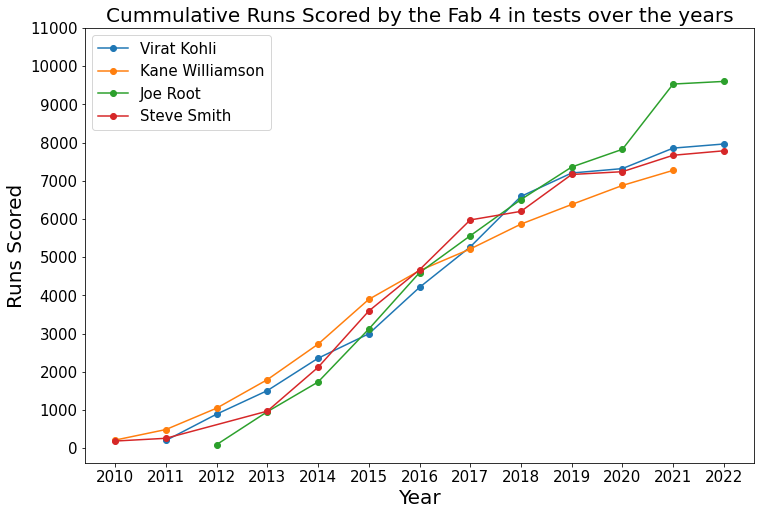

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data.Runs.cumsum(), '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data.Runs.cumsum(), '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data.Runs.cumsum(), '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data.Runs.cumsum(), '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs Scored', fontsize=20)
plt.xticks([i + 2010 for i in range(13)])
plt.yticks([i for i in range(0, 12000, 1000)])
plt.title('Cummulative Runs Scored by the Fab 4 in tests over the years', fontsize=20)

Text(0.5, 1.0, 'Average of the Fab 4 in tests over the years')

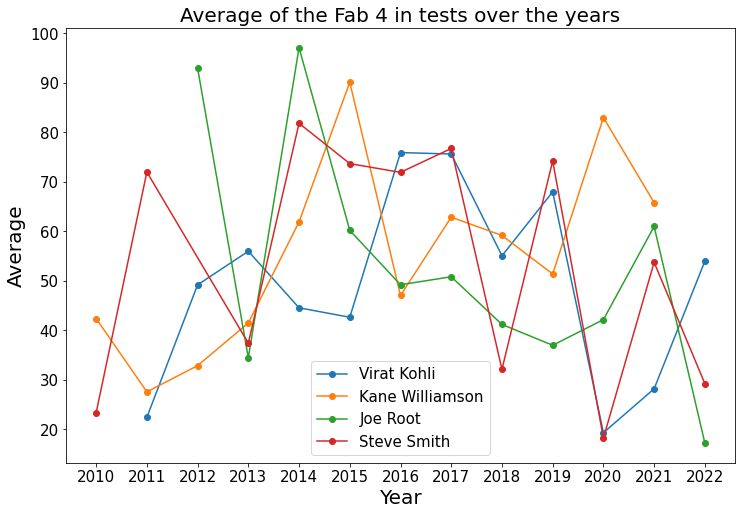

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data['Ave'], '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data['Ave'], '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data['Ave'], '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data['Ave'], '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average', fontsize=20)
plt.xticks([i + 2010 for i in range(13)])
plt.title('Average of the Fab 4 in tests over the years', fontsize=20)

Text(0.5, 1.0, '% Runs scored by Steve Smith')

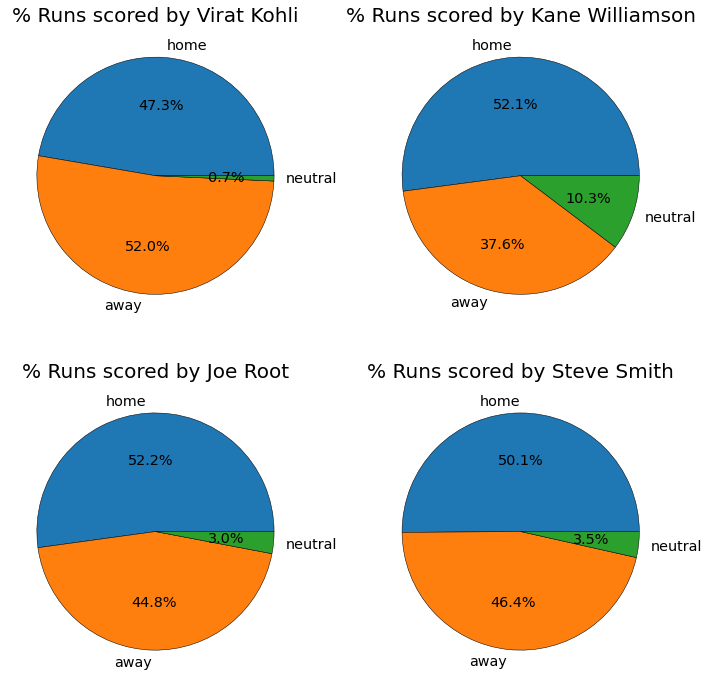

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')
plt.subplot(2, 2, 1)
d = vk_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Virat Kohli', fontsize=20)
plt.subplot(2, 2, 2)
d = kw_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Kane Williamson', fontsize=20)
plt.subplot(2, 2, 3)
d = jr_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Joe Root', fontsize=20)
plt.subplot(2, 2, 4)
d = ss_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Steve Smith', fontsize=20)

Text(0.5, 1.0, '% Runs scored by Steve Smith')

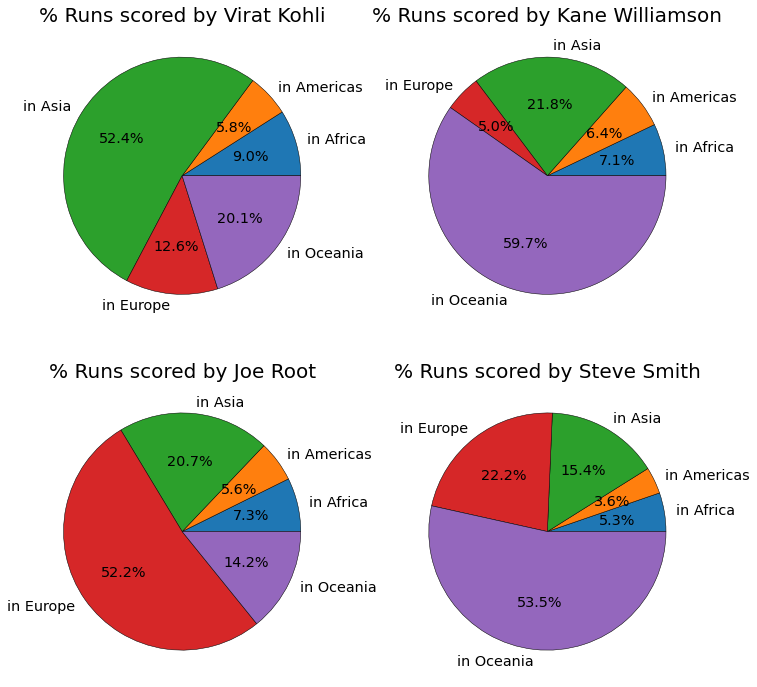

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')
plt.subplot(2, 2, 1)
d = vk_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Virat Kohli', fontsize=20)
plt.subplot(2, 2, 2)
d = kw_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Kane Williamson', fontsize=20)
plt.subplot(2, 2, 3)
d = jr_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Joe Root', fontsize=20)
plt.subplot(2, 2, 4)
d = ss_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Steve Smith', fontsize=20)

Text(0, 0.5, 'Average')

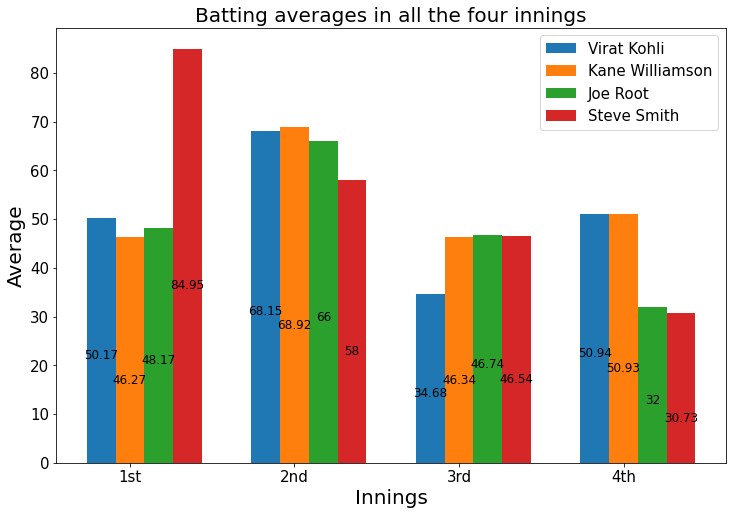

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
a = vk_rest_data[vk_rest_data['Grouping'].str.contains('match innings')]
b = kw_rest_data[kw_rest_data['Grouping'].str.contains('match innings')]
c = jr_rest_data[jr_rest_data['Grouping'].str.contains('match innings')]
d = ss_rest_data[ss_rest_data['Grouping'].str.contains('match innings')]
labels = ['1st', '2nd', '3rd', '4th']
x = np.arange(len(labels))
width = 0.35
aa = ax.bar(x-width/2, a['Ave'], width/2)
bb = ax.bar(x, b['Ave'], width/2)
cc = ax.bar(x+width/2, c['Ave'], width/2)
dd = ax.bar(x+width, d['Ave'], width/2)
ax.bar_label(aa, fontsize=12, label_type='center', padding=-15)
ax.bar_label(bb, fontsize=12, label_type='center', padding=-30)
ax.bar_label(cc, fontsize=12, label_type='center', padding=-15)
ax.bar_label(dd, fontsize=12, label_type='center', padding=-30)
ax.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
ax.set_xticks(x, labels)
ax.tick_params(axis='both', labelsize=15)
plt.title('Batting averages in all the four innings', fontsize=20)
plt.xlabel('Innings', fontsize=20)
plt.ylabel('Average', fontsize=20)

Text(0, 0.5, 'Average')

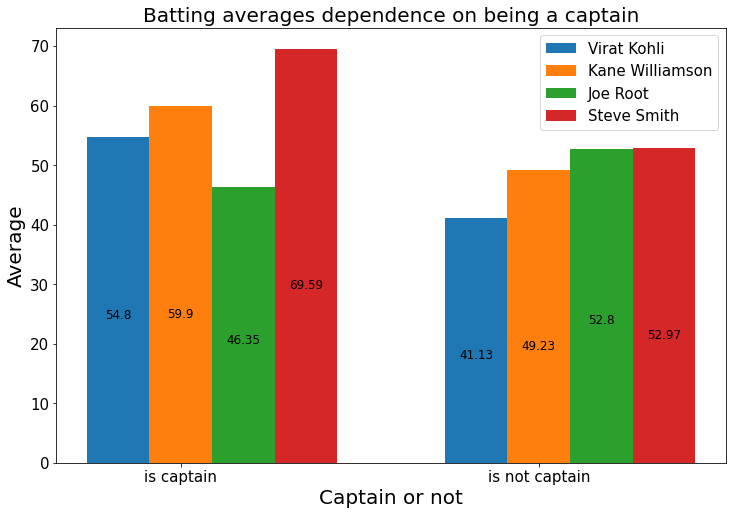

In [51]:
vk_rest_data[vk_rest_data['Grouping'].str.contains('')]

fig, ax = plt.subplots(figsize=(12, 8))
a = vk_rest_data[vk_rest_data['Grouping'].str.contains('captain')]
b = kw_rest_data[kw_rest_data['Grouping'].str.contains('captain')]
c = jr_rest_data[jr_rest_data['Grouping'].str.contains('captain')]
d = ss_rest_data[ss_rest_data['Grouping'].str.contains('captain')]
labels = ['is captain', 'is not captain']
x = np.arange(len(labels))
width = 0.35
aa = ax.bar(x-width/2, a['Ave'], width/2)
bb = ax.bar(x, b['Ave'], width/2)
cc = ax.bar(x+width/2, c['Ave'], width/2)
dd = ax.bar(x+width, d['Ave'], width/2)
ax.bar_label(aa, fontsize=12, label_type='center', padding=-15)
ax.bar_label(bb, fontsize=12, label_type='center', padding=-30)
ax.bar_label(cc, fontsize=12, label_type='center', padding=-15)
ax.bar_label(dd, fontsize=12, label_type='center', padding=-30)
ax.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
ax.set_xticks(x, labels)
ax.tick_params(axis='both', labelsize=15)
plt.title('Batting averages dependence on being a captain', fontsize=20)
plt.xlabel('Captain or not', fontsize=20)
plt.ylabel('Average', fontsize=20)

In [65]:
senai_countries = ['India', 'Australia', 'New Zealand', 'South Africa', 'England']
d = vk_demographic_data[vk_demographic_data['Grouping'].str.contains('v ')]
d


,Grouping,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,v Australia,20,36,1,1682,169,48.05,3204,52.49,7,5,3,190,5
1,v Bangladesh,4,5,0,392,204,78.40,504,77.77,2,0,1,46,1
2,v England,27,48,3,1960,235,43.55,3765,52.05,5,9,6,229,2
3,v New Zealand,11,21,2,866,211,45.57,1606,53.92,3,3,1,105,3
4,v South Africa,14,24,2,1236,254,56.18,2243,55.10,3,4,0,159,4
5,v Sri Lanka,9,15,2,1004,243,77.23,1449,69.28,5,2,1,91,6
6,v West Indies,14,19,0,822,200,43.26,1529,53.76,2,5,2,76,3


Text(0.5, 1.0, '% Runs scored by Steve Smith')

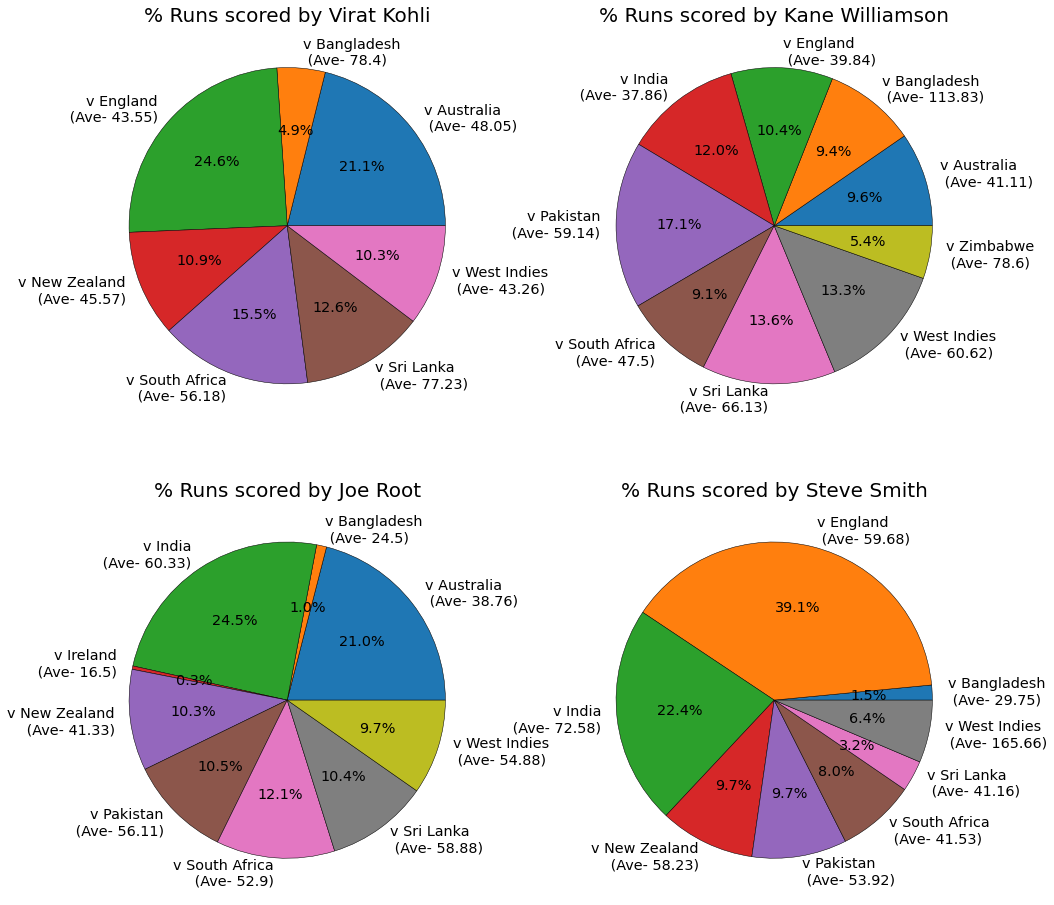

In [66]:
fig, ax = plt.subplots(figsize=(16, 16))
fig.set_facecolor('white')
plt.subplot(2, 2, 1)
d = vk_demographic_data[vk_demographic_data['Grouping'].str.contains('v ')]
plt.pie(d['Runs'], labels=d['Grouping'] + '\n (Ave- ' + d['Ave'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Virat Kohli', fontsize=20)
plt.subplot(2, 2, 2)
d = kw_demographic_data[kw_demographic_data['Grouping'].str.contains('v ')]
plt.pie(d['Runs'], labels=d['Grouping'] + '\n (Ave- ' + d['Ave'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Kane Williamson', fontsize=20)
plt.subplot(2, 2, 3)
d = jr_demographic_data[jr_demographic_data['Grouping'].str.contains('v ')]
plt.pie(d['Runs'], labels=d['Grouping'] + '\n (Ave- ' + d['Ave'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Joe Root', fontsize=20)
plt.subplot(2, 2, 4)
d = ss_demographic_data[ss_demographic_data['Grouping'].str.contains('v ')]
plt.pie(d['Runs'], labels=d['Grouping'] + '\n (Ave- ' + d['Ave'].astype(str) + ')', autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Steve Smith', fontsize=20)

# ODI MATCHES

In [81]:
vk_data = get_player_info(vk_id, 2)
kw_data = get_player_info(kw_id, 2)
jr_data = get_player_info(jr_id, 2)
ss_data = get_player_info(ss_id, 2)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [117]:
vk_demographic_data = vk_data.iloc[:30]
vk_year_wise_data = vk_data.iloc[30:45]
vk_szn_wise_data = vk_data.iloc[45:69]
vk_rest_data = vk_data.iloc[69:]

In [118]:
kw_demographic_data = kw_data.iloc[:30]
kw_year_wise_data = kw_data.iloc[30:41]
kw_szn_wise_data = kw_data.iloc[41:57]
kw_rest_data = kw_data.iloc[57:]

In [119]:
jr_demographic_data = jr_data.iloc[:29]
jr_year_wise_data = jr_data.iloc[29:38]
jr_szn_wise_data = jr_data.iloc[38:55]
jr_rest_data = jr_data.iloc[55:]

In [120]:
ss_demographic_data = ss_data.iloc[:33]
ss_year_wise_data = ss_data.iloc[33:44]
ss_szn_wise_data = ss_data.iloc[44:63]
ss_rest_data = ss_data.iloc[63:]

Text(0.5, 1.0, 'Runs Scored by the Fab 4 in ODIs over the years')

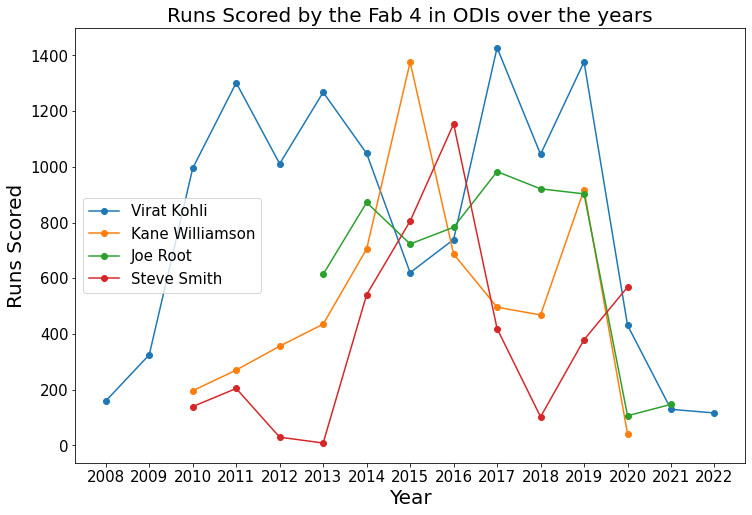

In [123]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data['Runs'], '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data['Runs'], '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data['Runs'], '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data['Runs'], '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs Scored', fontsize=20)
plt.xticks([i + 2008 for i in range(15)])
plt.title('Runs Scored by the Fab 4 in ODIs over the years', fontsize=20)

Text(0.5, 1.0, 'Cummulative Runs Scored by the Fab 4 in ODIs over the years')

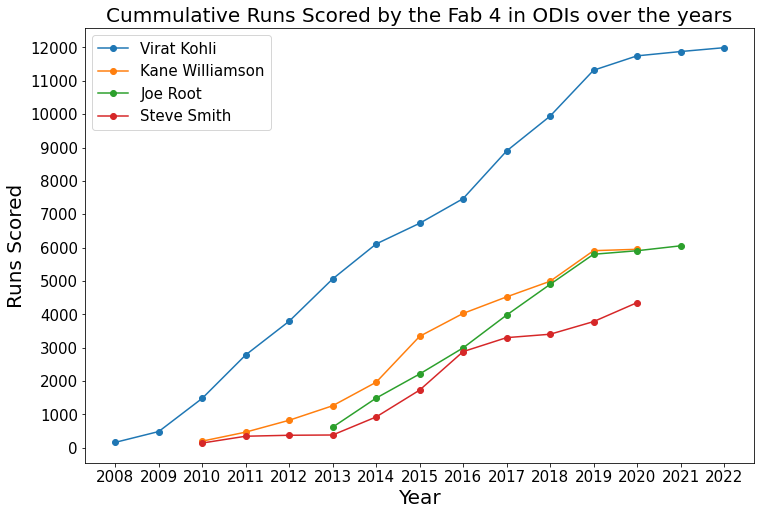

In [124]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data.Runs.cumsum(), '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data.Runs.cumsum(), '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data.Runs.cumsum(), '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data.Runs.cumsum(), '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs Scored', fontsize=20)
plt.xticks([i + 2008 for i in range(15)])
plt.yticks([i for i in range(0, 13000, 1000)])
plt.title('Cummulative Runs Scored by the Fab 4 in ODIs over the years', fontsize=20)

Text(0.5, 1.0, 'Average of the Fab 4 in ODIs over the years')

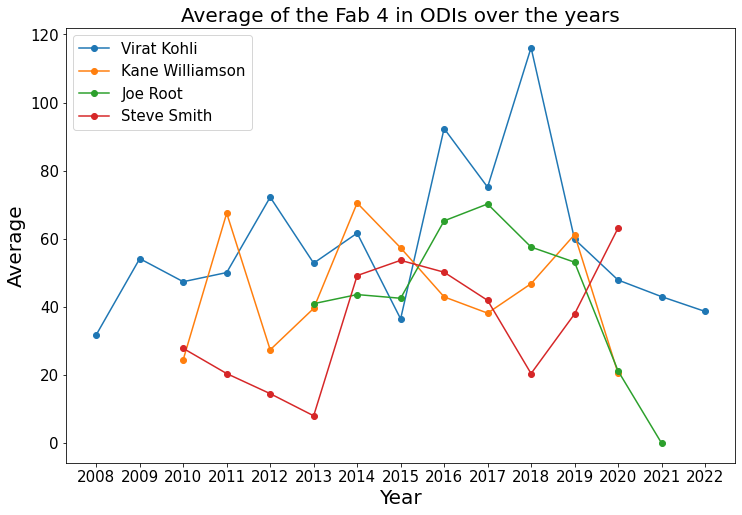

In [125]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data['Ave'], '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data['Ave'], '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data['Ave'], '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data['Ave'], '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average', fontsize=20)
plt.xticks([i + 2008 for i in range(15)])
plt.title('Average of the Fab 4 in ODIs over the years', fontsize=20)

Text(0.5, 1.0, '% Runs scored by Steve Smith')

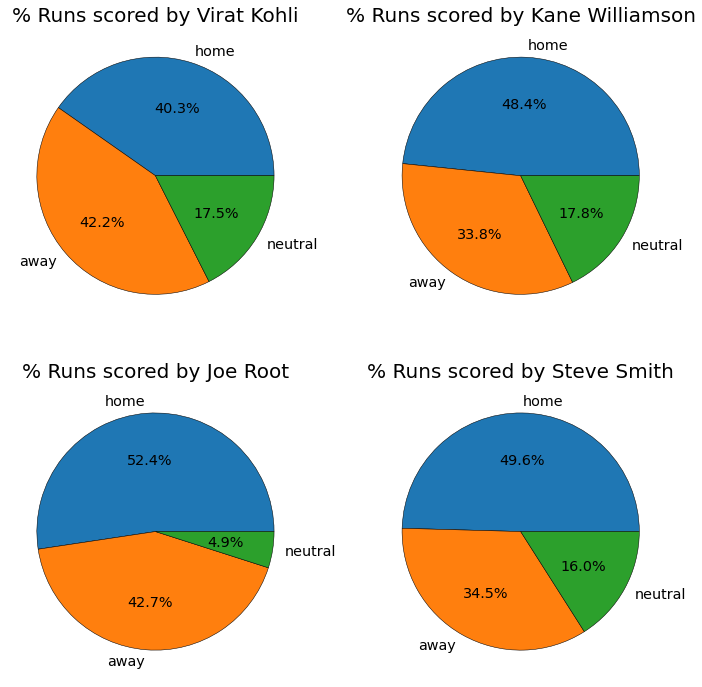

In [126]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')
plt.subplot(2, 2, 1)
d = vk_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Virat Kohli', fontsize=20)
plt.subplot(2, 2, 2)
d = kw_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Kane Williamson', fontsize=20)
plt.subplot(2, 2, 3)
d = jr_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Joe Root', fontsize=20)
plt.subplot(2, 2, 4)
d = ss_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Steve Smith', fontsize=20)

Text(0.5, 1.0, '% Runs scored by Steve Smith')

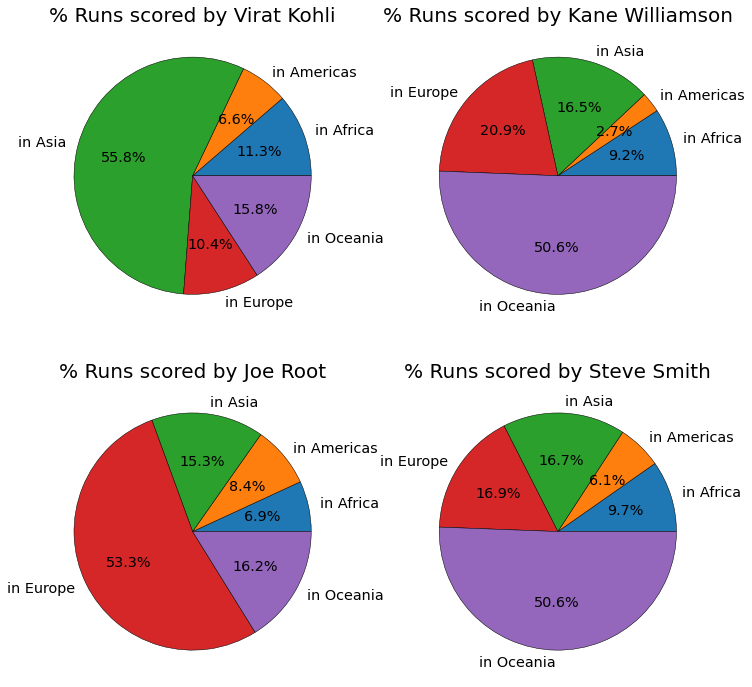

In [127]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')
plt.subplot(2, 2, 1)
d = vk_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Virat Kohli', fontsize=20)
plt.subplot(2, 2, 2)
d = kw_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Kane Williamson', fontsize=20)
plt.subplot(2, 2, 3)
d = jr_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Joe Root', fontsize=20)
plt.subplot(2, 2, 4)
d = ss_demographic_data.iloc[-8:-3, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('% Runs scored by Steve Smith', fontsize=20)